# MNIST Label-wise & Overall Centroid Reconstructions (Interactive)
This notebook reproduces your Python script as a Jupyter Notebook and is configured to work with the following environment:

- `python`
- `numpy`
- `scipy`
- `h5py`
- `ipywidgets`
- `matplotlib`
- `ipympl`
- `jupyterlab`
- `jupyterlab-myst`
- `nodejs>=20,<21`
- `mystmd`
- `tifffile`

> **Tip:** Run this in JupyterLab. The widget backend (`ipympl`) enables interactive Matplotlib figures.


## 0) Interactive backend (ipympl)
This cell attempts to use the `ipympl` (widget) backend for interactive plots. If it's not available, it falls back to `inline`.

In [1]:
# Attempt to use ipympl widget backend; fall back to inline if unavailable
try:
    import ipympl  # noqa: F401
    get_ipython().run_line_magic("matplotlib", "widget")
    print("Matplotlib backend set to 'widget' (ipympl).")
except Exception as e:
    get_ipython().run_line_magic("matplotlib", "inline")
    print("ipympl not available; using 'inline' backend instead.\n", e)

Matplotlib backend set to 'widget' (ipympl).


## 1) Imports

In [2]:
import os
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.widgets import RadioButtons
from PIL import Image
# Optional import; included in your environment, not required for PNGs here
try:
    import tifffile  # noqa: F401
except Exception:
    pass

# Make sure interactive updates are responsive in Jupyter
plt.rcParams.update({
    "figure.dpi": 100
})

## 2) Configuration
Update these paths to match your folders if needed.

In [3]:
# ──────────────────────────────────────────────────────────────
# CONFIGURATION: update these paths to match your folders
# ──────────────────────────────────────────────────────────────
BASE_RESULTS_DIR = r"D:\Results\mnist_ae_trial30"
LABEL_DIR        = os.path.join(BASE_RESULTS_DIR, "label_averages")
CENTROID_DIR     = os.path.join(BASE_RESULTS_DIR, "centroid_recon")

MEASURES = ["mean", "median", "geom_median"]
LABELS   = list(range(10))

print("BASE_RESULTS_DIR:", BASE_RESULTS_DIR)
print("LABEL_DIR:", LABEL_DIR)
print("CENTROID_DIR:", CENTROID_DIR)

BASE_RESULTS_DIR: D:\Results\mnist_ae_trial30
LABEL_DIR: D:\Results\mnist_ae_trial30\label_averages
CENTROID_DIR: D:\Results\mnist_ae_trial30\centroid_recon


## 3) Helpers to load images
This mirrors your original script and adds some friendly checks for missing files.

In [4]:
def _check_expected_files():
    missing = []
    # overall centroids
    for m in MEASURES:
        fn_cent = os.path.join(CENTROID_DIR, f"latent_centroid_{m}.png")
        if not os.path.exists(fn_cent):
            missing.append(fn_cent)
    # per-label
    for lbl in LABELS:
        for m in MEASURES:
            fn_lbl = os.path.join(LABEL_DIR, f"label_{lbl}_{m}.png")
            if not os.path.exists(fn_lbl):
                missing.append(fn_lbl)
    return missing

def load_images():
    missing = _check_expected_files()
    if missing:
        msg = ["The following required image files were not found:"] + missing
        raise FileNotFoundError("\n".join(msg))

    label_imgs    = {lbl: {} for lbl in LABELS}
    centroid_imgs = {}

    for m in MEASURES:
        # overall centroid
        fn_cent = os.path.join(CENTROID_DIR, f"latent_centroid_{m}.png")
        centroid_imgs[m] = np.array(Image.open(fn_cent).convert("L"))

        # per-label
        for lbl in LABELS:
            fn_lbl = os.path.join(LABEL_DIR, f"label_{lbl}_{m}.png")
            label_imgs[lbl][m] = np.array(Image.open(fn_lbl).convert("L"))

    return label_imgs, centroid_imgs

print("Helper functions defined.")

Helper functions defined.


## 4) Interactive figure
- Shows per-label images (0–9) plus the overall centroid image
- Use the **RadioButtons** in the bottom-right to switch among: `mean`, `median`, `geom_median`

Text(0.5, 0.98, 'MNIST Label-wise & Overall Centroid Reconstructions')

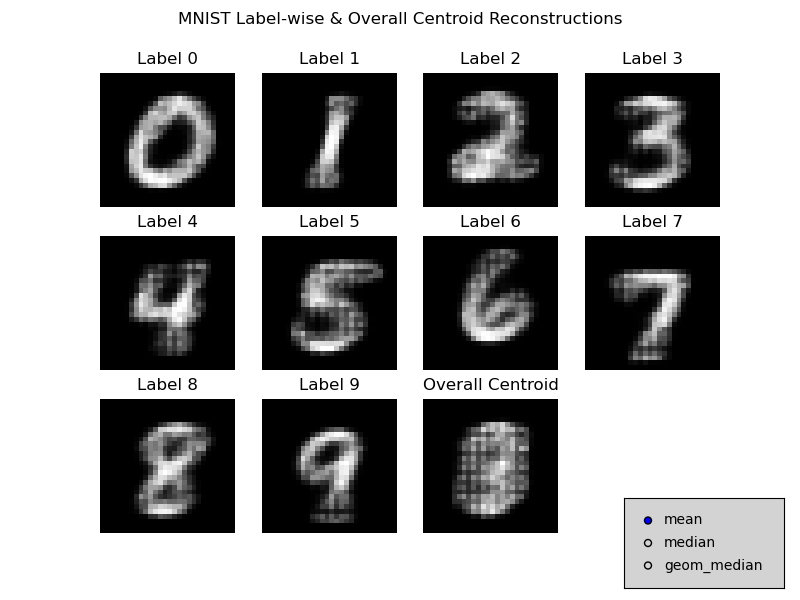

In [5]:
# Load images (raises helpful error if files are missing)
label_imgs, centroid_imgs = load_images()

# Create the grid of axes (3 rows x 4 cols = 12 slots)
fig, axes = plt.subplots(3, 4, figsize=(8, 6))
axes = axes.flatten()

# Initial display: 'mean'
ims = []
for i, lbl in enumerate(LABELS):
    ax = axes[i]
    im = ax.imshow(label_imgs[lbl]["mean"], cmap="gray")
    ax.set_title(f"Label {lbl}")
    ax.axis("off")
    ims.append(im)

# Overall centroid in slot 10
ax_cent = axes[10]
im_cent = ax_cent.imshow(centroid_imgs["mean"], cmap="gray")
ax_cent.set_title("Overall Centroid")
ax_cent.axis("off")

# Hide unused subplot (slot 11)
axes[11].axis("off")

# RadioButtons in bottom-right
# [left, bottom, width, height] in figure-relative coordinates
rax = plt.axes([0.78, 0.02, 0.20, 0.15], facecolor="lightgrey")
radio = RadioButtons(rax, MEASURES, active=0)

def on_select(measure):
    for idx, lbl in enumerate(LABELS):
        ims[idx].set_data(label_imgs[lbl][measure])
    im_cent.set_data(centroid_imgs[measure])
    fig.canvas.draw_idle()

radio.on_clicked(on_select)

plt.suptitle("MNIST Label-wise & Overall Centroid Reconstructions")

C:\Users\Work\AppData\Local\Temp\ipykernel_32560\3762115993.py:4: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout(rect=[0, 0.03, 1, 0.95])


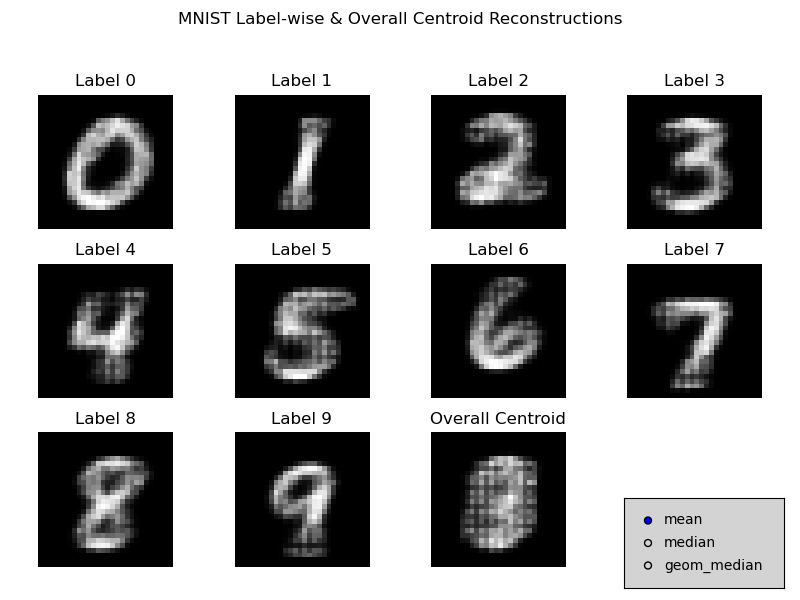

In [6]:
#| label: fig:mnist-ae-labels
#| caption: "MNIST theoretical representative images for all labels and the overall centroid."

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

---
### Notes
- If the widget controls don't appear in JupyterLab, ensure:
  - You're running in JupyterLab (not just classic Notebook), and
  - You executed the **backend** cell above successfully (should read *Matplotlib backend set to 'widget' (ipympl)*).
- File discovery:
  - The notebook expects PNGs with names like `label_3_mean.png` in `LABEL_DIR`
  - And centroid PNGs like `latent_centroid_median.png` in `CENTROID_DIR`.
